<a href="https://colab.research.google.com/github/PrajwalGupta3/ML/blob/main/local_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import joblib
from torchvision.models import resnet50
import matplotlib.pyplot as plt




In [23]:
# Load the trained SVM model
svm = joblib.load("my_svm_model.pkl")

# Load ResNet50 for feature extraction (without removing the final layer)
model = resnet50(pretrained=True)
model.eval()

# Function to process an image and extract features
def extract_features_from_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to match ResNet input
        transforms.ToTensor(),          # Convert image to tensor
    ])

    image = Image.open(image_path).convert("RGB")  # Open image
    image = transform(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        features = model(image)  # Extract features using ResNet50

    return features.squeeze().numpy().reshape(1, -1)  # Convert to 2D array






/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
# Mapping of class indices to CIFAR-10 class names
cifar10_classes = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# Put the image path here
image_path = "/content/car1.jpeg"

# Extract features from the image
image_features = extract_features_from_image(image_path)





Predicted class: automobile


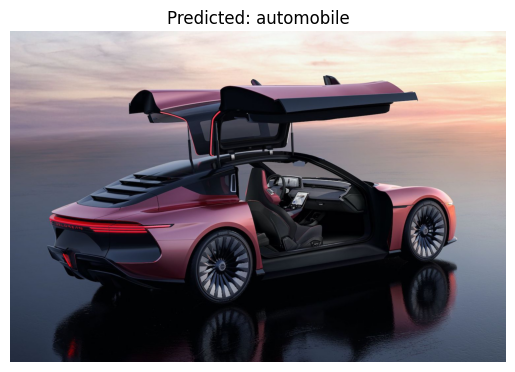

In [25]:
# Making a prediction
prediction = svm.predict(image_features)
predicted_index = prediction[0]
predicted_class = cifar10_classes.get(predicted_index, "Unknown")

print("Predicted class:", predicted_class)

# Load and display the image along with its predicted class
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.title("Predicted: " + predicted_class)
plt.axis('off')
plt.show()
